In [3]:
import nibabel as nib
import numpy as np
from sklearn.linear_model import Lasso,LassoCV,LinearRegression,Ridge
from sklearn.decomposition import TruncatedSVD, KernelPCA, PCA
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from scipy.ndimage.interpolation import zoom
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor, RandomForestRegressor, RandomForestClassifier
from mpl_toolkits.mplot3d import Axes3D
from math import sqrt,atan2,pi,ceil,acos,sin,cos
from sklearn.metrics import hamming_loss
from skimage.exposure import equalize_hist

from orelmisc import n_max,n_test_max,testpre,trainpre,saveCSV,shape_3d_org
from preprocess import flatten,flatten_each_sample,loadData,flatten_each_sample,precompute_and_save

In [4]:
prep_ = lambda i:cap(i)
def prep(a):
  return np.array(map(prep_single,a))

prep_single = lambda xs:map(prep_,xs)

cap = lambda p: 0 if p < 0.5 else 1
def pred_to_rgb(p):
  p = cap(p)
  v = p
  return (1-v,v,0.2)

y = np.zeros((n_max,3))
# gender: 1 = female, 0 = male
# age: 1 = young, 0 = old
# health: 1 = healthy, 0 = sick
y_gender = [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
y_age = [1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
y_health = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
y[:,0] = np.array(y_gender)
y[:,1] = np.array(y_age)
y[:,2] = np.array(y_health)

result = None
xa = 0
x = None
x_t = None
TO_RADIANS = pi/180

In [20]:
space = 70 # 35,50,70,100,150
hSize = space-1
bins = np.linspace(1,1700,space)
#bins = np.linspace(0,1,space)
sbins = bins[:-1]+1800/space/2

r_division = 6
theta_division = 4
phi_division = 6
# radius form 0 to 80
# theta from 0 to 180
# phi from 0 to 360
rMax = 80
tMin = 30
tMax = 180-tMin

x_division = 3
y_division = 3
z_division = 3

#ranges = [1,x_division,y_division,z_division]
#nBlocks = x_division*y_division*z_division
ranges = [1,r_division,theta_division,phi_division]
nBlocks = r_division*theta_division*phi_division
fnameSpherical = "spherical_every2.npy"
xSpherical = np.load(fnameSpherical)

bSize = hSize+0 # bsize means blockSize
ds = nBlocks*bSize # sum,sum2,sum3,avg,var,mode, numper of percentiles and histograms
iHist = 0
idxHist = lambda i: iHist+i*bSize
idxsFor = lambda i,many: np.array(range(idxHist(i)+hSize,idxHist(i)+hSize+many))

print "Number of Blocks:",nBlocks
print "Size of Histograms:",hSize
print "Numbers per Block:",bSize
print "Dimensions: ca.",nBlocks*bSize

def spherical2cart(r,theta,phi):
  return (r*sin(theta)*cos(phi),r*sin(theta)*sin(phi),r*cos(theta))

fromtoSpherical = lambda di,sph: zip(np.round(np.linspace(0,sph.shape[di],ranges[di]+1)),np.round(np.linspace(0,sph.shape[di],ranges[di]+1))[1:])

fromto = lambda di,sph: zip(np.round(np.linspace(0,sph.shape[di],ranges[di]+1)),np.round(np.linspace(0,sph.shape[di],ranges[di]+1))[1:])

from skimage.filters import sobel

#name = "output/"+str(space)+"_split_validated"
#fname = "many_hists_"+str(nBlocks)+"_space" + str(space) + ("_divs_%s_%s_%s.npy" % (r_division,theta_division,phi_division))

fname = "many_hists_histsSize%ssmoothed_stats_nBlocks%s_bSize%s_divs_%s_%s_%s.npy" % (hSize,nBlocks,bSize,r_division,theta_division,phi_division)
name = "output/%s" % fname[:-4]

def loadAndPreprocess():
    global d_org,x,x_t,xa,x_org,x_t_org,xa_org,xSpherical
    
    xa = np.zeros((n_max+n_test_max,ds))
    #xSpherical = np.zeros((n_max+n_test_max,rMax/2+1,(tMax-tMin)/2+1,360/2+1))
    
    i = 0
    #print "===== Calculate spherical coordiantes ===="
    i0 = i
    diff = 1
    max_diff = 45
    while i < n_max+n_test_max:
      if i > i0+min(diff,max_diff):
        print "  i = %s ... %.1f%%" % (i,float(i)/(n_max+n_test_max)*100)
        diff = 2*diff
        i0 = i
      
      #n_i,pre,t_str = (n_max,"set_train/","train") if i < n_max else (n_test_max,"set_test/","test")
      #filename = "%s%s_%s.nii" % (pre,t_str,i%n_max+1)
      #Xtotal,Ytotal,Ztotal = (176,208,176)
      #data = nib.load(filename).get_data().reshape((Xtotal,Ytotal,Ztotal))
      #data = data[35:130,40:150,10:100]

      # calculate histograms: 8*4*8 = 256 histograms
      hCount = 0
      for l,u in fromto(1,xSpherical):
        l0,u0=(int(l),int(u))
        for l,u in fromto(2,xSpherical):
          l1,u1=(int(l),int(u))
          for l,u in fromto(3,xSpherical):
            l2,u2=(int(l),int(u))
            cut = xSpherical[i,l0:u0,l1:u1,l2:u2]
            #cut = equalize_hist(org)
            #sb = sobel(np.average(cut,axis=2))
            h=np.histogram(cut.ravel(),bins=bins)[0]
            xa[i,idxHist(hCount):(idxHist(hCount)+hSize)] = h
            """plt.plot(h)
            plt.show()
            plt.plot(xa[i,idxHist(hCount):(idxHist(hCount)+hSize)])
            plt.show()
            return"""
            #k0,k1,k2 = cut.shape
            #pos = np.arange(k0).reshape((k0,1,1)) + np.arange(k1).reshape((1,k1,1)) + np.arange(k2).reshape((1,1,k2))
            #pos2 = pos*pos
            #xa[i,idxsFor(hCount,2)] = [np.average(org),np.std(org)]
            #xa[i,idxsFor(hCount,2)+2] = [np.sum(pos*cut),np.sum(pos2*cut)]
            #xa[i,idxsFor(hCount,2)+4] = [np.average(sb),np.std(sb)]
            #xa[i,idxsFor(hCount,2)+6] = [np.sum(pos*sb),np.sum(pos2*sb)]
            hCount = hCount + 1
      i = i+1
    
    np.save(fname,xa)
    print "======= Saved data matrix xa into %s =========" % fname
    
    #np.save(fnameSpherical,xSpherical)
    #print "======= Saved spherical coordinates into %s =========" % fnameSpherical

# switch to preprocess by setting True
if False:
  loadAndPreprocess()

xa = np.load("many_hists144_space70_divs_6_4_6.npy")
#xa = np.load(fname)
x,x_t = (xa[0:n_max,:],xa[n_max:,:])

print "Example:",xa[0,:20],"..."

Number of Blocks: 144
Size of Histograms: 69
Numbers per Block: 69
Dimensions: ca. 9936
Example: [  1.50725930e+09   1.22970297e+06   1.17935264e+05   2.33937207e+02
   1.79972709e+05   7.90000000e+01   2.89750000e+04   0.00000000e+00
   6.36842105e+00   1.70000000e+01   2.42631579e+01   3.46842105e+01
   2.01368421e+02   1.42768421e+03   2.67963158e+03   4.10484211e+03
   6.02205263e+03   8.55547368e+03   1.06259474e+04   1.15996316e+04] ...


In [21]:
if False:
  i = 413
  for theta in np.linspace(0,xSpherical[i].shape[1]-1,9):
    print theta
    plt.imshow(xSpherical[i,:,theta,:], cmap="gray", origin="lower")
    plt.show()
    plt.imshow(equalize_hist(xSpherical[i,:,theta,:],space), cmap="gray", origin="lower")
    plt.show()

In [22]:
from sklearn.model_selection import train_test_split

# xa. all data
# x. public training data
# y. public training targets
# x_t public to be predicted data

# xtr. training data
# ytr. training targets
# xts. validation data
# yts. validation targets

b = [0,1]
types = [ [a1,a2,a3] for a1 in b for a2 in b for a3 in b]
Ntypes = len(types)

def get_by(t,ys):
    idxs = range(0,len(ys))
    return filter(lambda i:list(ys[i,:])==list(t),idxs)

#indices for splitting
typeIdxs = [get_by(t,y) for t in types]

typeIdxsTR = []
typeIdxsTS = []

for i in range(0,Ntypes):
    atr,ats,_,_ = train_test_split(typeIdxs[i],np.zeros(len(typeIdxs[i])),test_size=0.3,random_state=1)
    typeIdxsTR.append(atr)
    typeIdxsTS.append(ats)
    
typeIdxs = np.array(typeIdxs)
typeIdxsTR = np.array(typeIdxsTR)
typeIdxsTS = np.array(typeIdxsTS)

ratios = [float(len(i))/n_max for i in typeIdxs]

# gender: 1 = female, 0 = male
# age: 1 = young, 0 = old
# health: 1 = healthy, 0 = sick

def show_diff_for(name,es1,es2,total):
  es = map(lambda x,y:x-y,es1,es2)
  abses = map(abs,es)
  print name,"contains",sum(abses)/2,"samples of total",total,": %0.2f%%" % (100*float(sum(abses))/total)
  for i in range(0,8):
      tp = ((100*float(es[i])/total),types[i],es[i])
      print "  %0.2f%%: %s with samples: #%s" % tp
      
def show_diff(name,es1,es2):
  es1 = map(len,es1)
  es2 = map(len,es2)
  show_diff_for(name,es1,es2,total=sum(es1))
        
def show_for(name,es):
  es1 = map(lambda x:len(x),es)
  show_diff_for(name,es1,[0]*8,sum(es1))

show_for("public Training",typeIdxs)
show_for("our Training",typeIdxsTR)
show_for("our Test",typeIdxsTS)

xtr = np.vstack([x[idxs]for idxs in typeIdxsTR])
xts = np.vstack([x[idxs]for idxs in typeIdxsTS])
ytr = np.vstack([y[idxs]for idxs in typeIdxsTR])
yts = np.vstack([y[idxs]for idxs in typeIdxsTS])

# [0,1,1] => [0,0,0,1,0,0,0,0]
def binary2monadic(y):
  ys = np.zeros((len(y),1))
  for i,yi in enumerate(y):
    # ys[i,int(yi[0]*4+yi[1]*2+yi[2])] = 1
    ys[i] = int(yi[0]*4+yi[1]*2+yi[2])
  return ys

convertInt = lambda i:map(lambda x: 1 if int(x) is not 0 else 0,[int(i)&4,int(i)&2,int(i)&1])
#convertInt = lambda i:map(lambda x: 1 if int(x) is not 0 else 0,[int(i)&4,int(i)&2,int(i)&1])

def monadic2binary(y):
  #return np.array([convertInt(list(yi).index(1)) for yi in y])
  return np.array([convertInt(yi) for yi in y])

def continousMonadic2binary(y):
  ys = np.zeros((len(y),3))
  for i,yi in enumerate(y):
    #gender
    """a,b = (np.sum(yi[:4]),np.sum(yi[4:]))
    ys[i,0] = b/(a+b)
    #age
    a,b = (np.sum(yi[0:8:4]+yi[1:8:4]),np.sum(yi[2:8:4]+yi[3:8:4]))
    ys[i,1] = b/(a+b)

    #health
    a,b = (np.sum(yi[0:8:2]),np.sum(yi[1:8:2]))
    ys[i,2] = b/(a+b)"""
    ys[i] = convertInt(np.argmax(yi))
  return ys

print "Splitted data into test and validation data"

public Training contains 139 samples of total 278 : 100.00%
  10.07%: [0, 0, 0] with samples: #28
  6.47%: [0, 0, 1] with samples: #18
  0.00%: [0, 1, 0] with samples: #0
  22.30%: [0, 1, 1] with samples: #62
  14.03%: [1, 0, 0] with samples: #39
  17.27%: [1, 0, 1] with samples: #48
  0.00%: [1, 1, 0] with samples: #0
  29.86%: [1, 1, 1] with samples: #83
our Training contains 96 samples of total 192 : 100.00%
  9.90%: [0, 0, 0] with samples: #19
  6.25%: [0, 0, 1] with samples: #12
  0.00%: [0, 1, 0] with samples: #0
  22.40%: [0, 1, 1] with samples: #43
  14.06%: [1, 0, 0] with samples: #27
  17.19%: [1, 0, 1] with samples: #33
  0.00%: [1, 1, 0] with samples: #0
  30.21%: [1, 1, 1] with samples: #58
our Test contains 43 samples of total 86 : 100.00%
  10.47%: [0, 0, 0] with samples: #9
  6.98%: [0, 0, 1] with samples: #6
  0.00%: [0, 1, 0] with samples: #0
  22.09%: [0, 1, 1] with samples: #19
  13.95%: [1, 0, 0] with samples: #12
  17.44%: [1, 0, 1] with samples: #15
  0.00%: [1, 

In [23]:
def prep_by_percentage(pi):
  nElems = len(pi)
  pi = pi.reshape((nElems,3))
  samplesNeeded = np.rint(np.floor(np.array(ratios)*0.5*nElems))
  for r in range(0,nElems):
    s = np.array(samplesNeeded,copy=True)
    s[s <= 0] = np.max(s)+1
    if len(samplesNeeded[samplesNeeded>0]) is 0:
      break
    i = np.argmin(s)
    ti = np.array(types[i])
    # find nearest prediction for this type
    dx = pi-ti
    dx[dx==0] = np.max(dx)+1
    j = np.argmin(np.sum(dx*dx,axis=1))
    pi[j] = ti
    samplesNeeded[i]=samplesNeeded[i]-1
  
  return np.array(prep(pi))
  
# prep_single_by_percentage(np.random.random((50,3)))

In [24]:
def applyClassification(classf,label,preprocess=None,uni=False,addXTR=None,addXTS=None,addX_T=None):
  prefix_str,model = classf
  if label is None:
    get_label = lambda ys: ys
  else:
    get_label = lambda ys: ys[:,label]
  if addXTR is None:
    xtr1 = xtr
    xts1 = xts
    x_t1 = x_t
  else:
    xtr1 = np.concatenate((xtr,addXTR),axis=1)
    xts1 = np.concatenate((xts,addXTS),axis=1)
    x_t1 = np.concatenate((x_t,addX_T),axis=1)
  
  xtr1 = preprocess.fit_transform(xtr1) if preprocess is not None else xtr1
  xts1 = preprocess.transform(xts1) if preprocess is not None else xts1
  x_t1 = preprocess.transform(x_t1) if preprocess is not None else x_t1
  
  yts_pred = model.fit(xtr1,get_label(ytr)).predict(xts1)
  ytr_pred = model.predict(xtr1)
  y_t_pred = model.predict(x_t1)
  
  if not uni:
    #y_t_pp = prep_single(y_t_pred)
    yts_pp = prep_single(yts_pred)
    ytr_pp = prep_single(ytr_pred)

    trCorrect = len(filter(lambda x:x,map(lambda x,y:x==y,get_label(ytr),ytr_pp)))
    tsCorrect = len(filter(lambda x:x,map(lambda x,y:x==y,get_label(yts),yts_pp)))
    ltr = 100*hamming_loss(get_label(ytr),ytr_pp)
    lts = 100*hamming_loss(get_label(yts),yts_pp)

    print "|   %3d    /    %3d    |   %3d   /     %3d    |    %3.1f%%     |     %3.1f%%     |" % (trCorrect,len(xtr)-trCorrect,tsCorrect,len(xts)-tsCorrect,ltr,lts)
  else:
    ltr,lts = (0,0)
  
  return model,ltr,lts,ytr_pred,yts_pred,y_t_pred

def applyClassificationSeparated(classf,predictGenderFromAgeHealth,prepPercentage,preprocess,uni):
  prefix = classf[0]
  # TODO: copy output to file
  print "### Prediction with ###\n","  ",prefix,"\n"
  
  print "| Predictions training | Predictions test     | Hamming Loss | Hamming Loss |"
  print "|  correct / incorrect | correct / incorrect  |   Training   |    Test      |"
  if uni:
    yutr = binary2monadic(ytr)
    yuts = binary2monadic(yts)
    models,ltr,lts,ytr_pred_real_m,yts_pred_real_m,y_t_pred_real_m = applyClassification(classf,
                                                                               label=None,preprocess=preprocess,
                                                                               uni=uni)
    ytr_pred_real = continousMonadic2binary(ytr_pred_real_m)
    yts_pred_real = continousMonadic2binary(yts_pred_real_m)
    y_t_pred_real = continousMonadic2binary(y_t_pred_real_m)
    
  else:
    model2,ltr2,lts2,ytr_pred2,yts_pred2,y_t_pred2 = applyClassification(classf,1,preprocess=preprocess)
    model3,ltr3,lts3,ytr_pred3,yts_pred3,y_t_pred3 = applyClassification(classf,2,preprocess=preprocess)
    addXTR = None
    addXTS = None
    addX_T = None
    if predictGenderFromAgeHealth:
      addXTR = np.stack((ytr_pred2,ytr_pred3),axis=1)
      addXTS = np.stack((yts_pred2,yts_pred3),axis=1)
      addX_T = np.stack((y_t_pred2,y_t_pred3),axis=1)

    model1,ltr1,lts1,ytr_pred1,yts_pred1,y_t_pred1 = applyClassification(
              classf,0,addXTR=addXTR,addXTS=addXTS,addX_T=addX_T,preprocess=preprocess)
    
    ytr_pred_real = np.array([ytr_pred1,ytr_pred2,ytr_pred3]).transpose()
    yts_pred_real = np.array([yts_pred1,yts_pred2,yts_pred3]).transpose()
    y_t_pred_real = np.array([y_t_pred1,y_t_pred2,y_t_pred3]).transpose()
    models = [model1,model2,model3]
  
  if prepPercentage:
    y_pred_T = prep_by_percentage(y_t_pred_real)
    y_pred_tr = prep_by_percentage(ytr_pred_real)
    y_pred_ts = prep_by_percentage(yts_pred_real)
  else:
    y_pred_T = prep(y_t_pred_real)
    y_pred_tr = prep(ytr_pred_real)
    y_pred_ts = prep(yts_pred_real)
  
  ltr = 100*hamming_loss(ytr,y_pred_tr)
  lts = 100*hamming_loss(yts,y_pred_ts)
  
  print "|                     Total                   |    %3.1f%%     | >>  %3.1f%%  << |" % (ltr,lts)
  
  return (y_pred_T,y_t_pred_real,y_pred_ts,ltr,lts,models)

In [25]:
def doStuff(do="rf",al=15,comps=n_max-1,n_est=120,k1="rbf",
            max_depth=7,msplit=10,feats=0.3,samps=0.3,rs=0,nn=20,weights="distance",p=2,prepPercentage=False,
            kpcaK="rbf",preprocess=None,uni=True,mcl=False,
            kernel="rbf",coef0=1,deg=3,gamma=1.0/600,C=80,n_comps=15,f=0.5,msp=15,pgah=False):
  #prefix,model = makeLassoPrediction(al=al)
  #prefix,model = makeAdaDefaultBaseEstimatorPrediction(n_est=n_est,max_depth=max_depth,msplit=msplit)
  #prefix,model = makeAdaLassoPrediction(al=al,n_est=n_est)
  #prefix,model = kernelSVM(kernel=kernel,coef0=coef0,probability=p,degree=deg,gamma=gamma,C=C)
  #prefix,model = kernelSVMwithDimReduction(kernel=kernel,k1=k1,coef0=coef0,probability=p,degree=deg,gamma=gamma,C=C,n_comps=n_comps)
  #prefix,model = kSVM_Ada(n_est=n_est,kernel=kernel,k1=k1,coef0=coef0,probability=p,degree=deg,gamma=gamma,C=C,n_comps=n_comps)
  #prefix,model = makeBaggingBoostLassoPrediction(al=al,n_est=n_est,feats=feats,samps=samps)
  #prefix,model = makeSVDLassoPrediction(al=al,comps=comps)
  #prefix,model = makeLassoCVPrediction(cv=3)
  #prefix,model = makeLinearRegression()
  #prefix,model = makeRidgePrediction(al=al)
  #prefix,model = makeGaussianProcess()
  # Bagging Lasso works poorly when validated and on the public score. forget this.
  #prefix,model = makeBaggingBoostLassoPrediction(al=al,n_est=n_est,feats=feats,samps=samps)
  
  
  if do is "rf":
    prefix = "%s_RandomForest_n%s_feats%s_msp%s_max_depth%s_rs%s"%(name,n_est,f,msp,max_depth,rs)
    model = RandomForestRegressor(n_est,max_features=f,min_samples_split=msp,max_depth=max_depth,random_state=rs)
  elif do is "al":
    prefix = "%s_Ada_Lasso_Alpha%s_n_est%s_rs%s"%(name,al,n_est,rs)
    model = AdaBoostRegressor(Lasso(alpha=al),n_estimators=n_est,random_state=rs)
  elif do is "ks":
    prefix = "%s_Kernel_SVM_kernel%s_C%s_def%s_coef0_%s"%(name,kernel,C,deg,coef0)
    model = SVC(kernel=kernel,C=C,degree=deg,coef0=coef0)
  elif do is "aks":
    prefix = "%s_Ada_n_est%s_rs%s_Kernel_SVM_kernel%s_C%s_def%s_coef0_%s"%(name,n_est,rs,kernel,C,deg,coef0)
    model = AdaBoostRegressor(SVC(kernel=kernel,C=C,degree=deg,coef0=coef0),n_estimators=n_est,random_state=rs)
  elif do is "nn":
    prefix = "%s_K-NearestNeighbors_nn%s_weights_%s_p%s"%(name,nn,weights,p)
    model = KNeighborsRegressor(n_neighbors=nn,weights=weights,p=p)
  
  if mcl:
    uni = True
    print "Setting uni to True because of mcl == True"
    prefix = prefix + "_MCL"
    model = OneVsRestClassifier(model)
  
  if preprocess is "kpca":
    prefix="%s_PREP_kpca_kernel_%s"%(prefix,kernel)
    preprocess = KernelPCA(kernel=kpcaK)
  else:
    preprocess = None
  
  if uni:
    prefix = prefix + "_UNIFIED"
  
  y_pred_T,yt_real,y_pred_ts,ltr,lts,models = applyClassificationSeparated((prefix,model),preprocess=preprocess,
                                                                           predictGenderFromAgeHealth=pgah,
                                                                          prepPercentage=prepPercentage,
                                                                          uni=uni)
  
  prefix = "%s_ltr%.3f_lts_%.3f"%(prefix,ltr/100,lts/100)
  
  eachX_T = np.array([ get_by(t,y_pred_ts) for t in types])
  #show_for("our Test",typeIdxsTS)
  #show_for("predicted Test",eachX_T)
  show_diff("Error",eachX_T,typeIdxsTS)
  
  if uni:
    models = [models,models,models]
  visualize("Gender",y_pred_T[:,0],models[0],prefix=prefix,do=do)
  visualize("Age   ",y_pred_T[:,1],models[1],prefix=prefix,do=do)
  visualize("Health",y_pred_T[:,2],models[2],prefix=prefix,do=do)

    
  # Plot 3D:
  fig = plt.figure(figsize=(10,5))

  ax = fig.add_subplot(221, projection='3d')
  ns = lambda x,n: np.random.random((n))*0.2
  xs = y[:,0]+ns(0,n_max)
  ax.scatter(xs, y[:,1]+ns(0,n_max), y[:,2]+ns(0,n_max),c=xs)
  ax.set_xlabel('Gender')
  ax.set_ylabel('Age')
  ax.set_zlabel('Health')
  ax.view_init(azim=20)

  ax = fig.add_subplot(222, projection='3d')
  xs = yt_real[:,0]+ns(0,n_test_max)
  ax.scatter(xs, yt_real[:,1]+ns(0,n_test_max), yt_real[:,2]+ns(0,n_test_max),c=xs)
  ax.set_xlabel('Gender')
  ax.set_ylabel('Age')
  ax.set_zlabel('Health')
  ax.view_init(azim=20)

  ax = fig.add_subplot(223, projection='3d')
  xs = y_pred_T[:,0]+ns(0,n_test_max)
  ax.scatter(xs, y_pred_T[:,1]+ns(0,n_test_max), y_pred_T[:,2]+ns(0,n_test_max),c=xs)
  ax.set_xlabel('Gender')
  ax.set_ylabel('Age')
  ax.set_zlabel('Health')
  ax.view_init(azim=20)
  fig.savefig(prefix+"_3D.png")
  plt.show()
  
  savePrediction(y_pred_T,prefix)
  
  result = (x,y,x_t,y_pred_T,y_pred_ts)

def visualize(labelName,y_pred,model,do,prefix):
  total = int(len(y_pred)*0.7)
  zeros = int(len(filter(lambda x:x == 0,y_pred))*0.7)
  print labelName," ","0"*zeros,"#","1"*(total-zeros),"***"
  if do[0] is "a":
    plt.plot(model.estimator_errors_)
    plt.title("Estimator errors")
    plt.savefig(prefix+"_"+str(labelName)+".png")
    plt.show()
  if do is "ks":
    print "Using #",len(model.support_),"# support vectors"
  if do is "aks":
    print "Using average #",np.average([len(m.support_) for m in model.estimators_]),"# support vectors"

def savePrediction(ys,prefix):
    savedFilename = saveCSV(ys,prefix)
    print("Saved predictions into %s" % savedFilename)

### Prediction with ###
   output/many_hists_histsSize69smoothed_stats_nBlocks144_bSize69_divs_6_4_6_RandomForest_n400_feats0.2_msp10_max_depth2_rs0 

| Predictions training | Predictions test     | Hamming Loss | Hamming Loss |
|  correct / incorrect | correct / incorrect  |   Training   |    Test      |
|   192    /      0    |    80   /       6    |    0.0%     |     7.0%     |
|   187    /      5    |    70   /      16    |    2.6%     |     18.6%     |
|   172    /     20    |    61   /      25    |    10.4%     |     29.1%     |
|                     Total                   |    4.3%     | >>  18.2%  << |
Error contains 23 samples of total 86 : 53.49%
  -9.30%: [0, 0, 0] with samples: #-8
  -6.98%: [0, 0, 1] with samples: #-6
  0.00%: [0, 1, 0] with samples: #0
  -10.47%: [0, 1, 1] with samples: #-9
  16.28%: [1, 0, 0] with samples: #14
  4.65%: [1, 0, 1] with samples: #4
  0.00%: [1, 1, 0] with samples: #0
  5.81%: [1, 1, 1] with samples: #5
Gender   00000000 # 11111111111111111

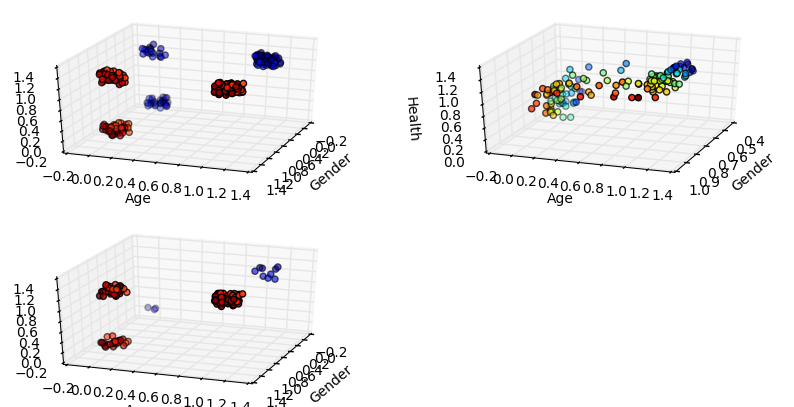

Saved predictions into output/many_hists_histsSize69smoothed_stats_nBlocks144_bSize69_divs_6_4_6_RandomForest_n400_feats0.2_msp10_max_depth2_rs0_ltr0.043_lts_0.182.csv


In [26]:
doStuff(
  preprocess="none",kpcaK="linear",
  #do = "nn",nn=8,weights="distance",p=1,
  #do = "aks",n_est=5,kernel="linear",gamma=1.0/2,coef0=1,deg=2,k1="poly",n_comps=15,C=1,
  #do = "ks",kernel="poly",gamma=0.01/2,coef0=1,deg=2,k1="poly",n_comps=15,C=1,
  #do = "al",n_est=15,al=100,
  do = "rf",n_est=400,f=0.2,msp=10,max_depth=2,rs=0,
  prepPercentage = False,
  pgah = False,
  uni = False, mcl=False,
  msplit=70)

===================================================================================================================
### Next steps
* take a look at the empirical distribution (Anteile) of the predicted classes.
   All the real-valued predictions can be plotted in a 3D plot :)
   If there are too few (many) predictions in a class (by comparision to Anteile in training set),
   then move the closest other samples to our class (furthest of current samples to another class).
* Focus on Amygdala and Hippocampus for classification
* Use Age and Health for improving Gender Prediction
* Show the most-frequently used decision attributes for RandomForest
* Use image processing features
* pie output to file and save it as well
* Wellenfeldinteraktionen (FT and Sum)
* use neural networks for spatial information
* male => more amount of grey matter

In [25]:
for i in range(0,8):
  print types[i]," => ",typeIdxs[i]

[0, 0, 0]  =>  [8, 13, 17, 27, 36, 37, 48, 51, 54, 65, 96, 115, 117, 135, 138, 143, 151, 156, 157, 178, 180, 190, 194, 196, 205, 220, 241, 266]
[0, 0, 1]  =>  [3, 7, 23, 28, 31, 64, 79, 90, 126, 145, 148, 207, 223, 227, 228, 232, 234, 245]
[0, 1, 0]  =>  []
[0, 1, 1]  =>  [0, 1, 4, 11, 12, 14, 19, 20, 21, 22, 24, 25, 35, 38, 39, 42, 47, 53, 66, 67, 74, 75, 76, 80, 81, 82, 87, 95, 99, 103, 106, 124, 127, 140, 149, 150, 152, 155, 164, 166, 170, 174, 192, 195, 198, 204, 208, 210, 211, 216, 217, 224, 230, 235, 237, 240, 244, 247, 248, 250, 253, 254]
[1, 0, 0]  =>  [15, 16, 30, 55, 58, 60, 71, 77, 78, 102, 108, 121, 125, 130, 132, 133, 158, 161, 162, 167, 175, 177, 181, 187, 188, 197, 202, 206, 218, 225, 229, 242, 249, 255, 256, 257, 260, 261, 265]
[1, 0, 1]  =>  [2, 5, 6, 26, 32, 33, 40, 50, 59, 63, 68, 72, 86, 88, 91, 92, 94, 97, 98, 104, 107, 110, 112, 113, 119, 129, 134, 136, 142, 144, 147, 159, 160, 168, 169, 173, 182, 183, 189, 191, 193, 209, 212, 215, 219, 231, 233, 243]
[1, 1, 0]  =

40.0


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


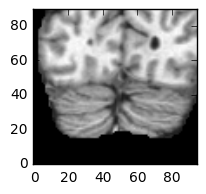

52.2222222222


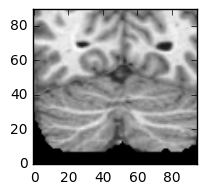

64.4444444444


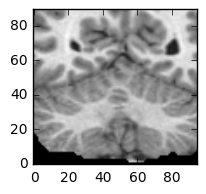

76.6666666667


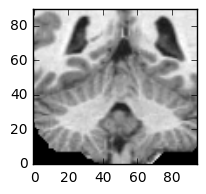

88.8888888889


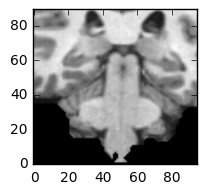

101.111111111


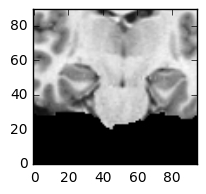

113.333333333


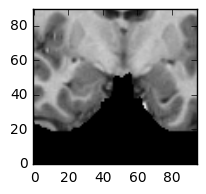

125.555555556


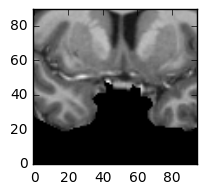

137.777777778


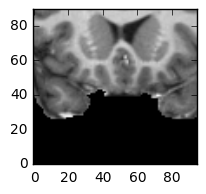

150.0


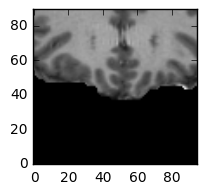

In [142]:
Xtotal,Ytotal,Ztotal = (176,208,176)
data = nib.load("set_train/train_123.nii").get_data().reshape((Xtotal,Ytotal,Ztotal))
plt.clf()
for theta in np.linspace(40,150,10):
  print theta
  plt.figure(figsize=(9,2))
  plt.imshow(data[35:130,theta,10:100].T, cmap="gray", origin="lower")
  plt.show()

In [70]:
#yt = np.random.random((1,8))
yi = yt[0]

print yt
print continousMonadic2binary(yt)

[[ 0.58653306  0.74147441  0.14442396  0.9015676   0.17841104  0.41374105
   0.1874758   0.45119953]]
[[ 0.34143874  0.46733647  0.69572908]]


In [105]:
print types
print binary2monadic(types)
r = np.random.random((1,8))
print r
print continousMonadic2binary(r)

[[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]]
[[ 0.25008103  0.99662929  0.30960187  0.69494176  0.49207338  0.27817648
   0.8320414   0.29694763]]
[[ 0.45759358  0.51404321  0.54612675]]


In [108]:
types

[[0, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 1],
 [1, 0, 0],
 [1, 0, 1],
 [1, 1, 0],
 [1, 1, 1]]